- **DOMAIN:** Autonomous Vehicles
- **CONTEXT:** A Recognising multi-digit numbers in photographs captured at street level is an important component of modern-day map making. A classic example of a corpus of such street-level photographs is Google’s Street View imagery composed of hundreds of millions of geo-located 360-degree panoramic images. The ability to automatically transcribe an address number from a geo-located patch of pixels and associate the transcribed number with a known street address helps pinpoint, with a high degree of accuracy, the location of the building it represents. More broadly, recognising numbers in photographs is a problem of interest to the optical character recognition community. While OCR on constrained domains like document processing is well studied, arbitrary multi-character text recognition in photographs is still highly challenging. This difficulty arises due to the wide variability in the visual appearance of text in the wild on account of a large range of fonts, colours, styles, orientations, and character arrangements. The recognition problem is further complicated by environmental factors such as lighting, shadows, specularity, and occlusions as well as by image acquisition factors such as resolution, motion, and focus blurs. In this project, we will use the dataset with images centred around a single digit (many of the images do contain some distractors at the sides). Although we are taking a sample of the data which is simpler, it is more complex than MNIST because of the distractors.
- **DATA DESCRIPTION:** The SVHN is a real-world image dataset for developing machine learning and object recognition algorithms with the minimal requirement on data formatting but comes from a significantly harder, unsolved, real-world problem (recognising digits and numbers in natural scene images). SVHN is obtained from house numbers in Google Street View images. Where the labels for each of this image are the prominent number in that image i.e. 2,6,7 and 4 respectively. The dataset has been provided in the form of h5py files. You can read about this file format here: https://docs.h5py.org/en/stable/ 

In [72]:
import h5py

In [73]:
h5py.run_tests()

1

In [74]:
df_B=h5py.File('Autonomous_Vehicles_SVHN_single_grey1.h5', 'r')

In [75]:
df_B

<HDF5 file "Autonomous_Vehicles_SVHN_single_grey1.h5" (mode r)>

In [76]:
print(list(df_B.keys()))

['X_test', 'X_train', 'X_val', 'y_test', 'y_train', 'y_val']


In [77]:
X_train_B = df_B['X_train'][:]
X_test_B = df_B['X_test'][:]
y_train_B = df_B['y_train'][:]
y_test_B = df_B['y_test'][:]
X_val_B = df_B['X_val'][:]
y_val_B = df_B['y_val'][:]

In [78]:
y_train_B

array([2, 6, 7, ..., 7, 0, 4], dtype=uint8)

<Axes: ylabel='Density'>

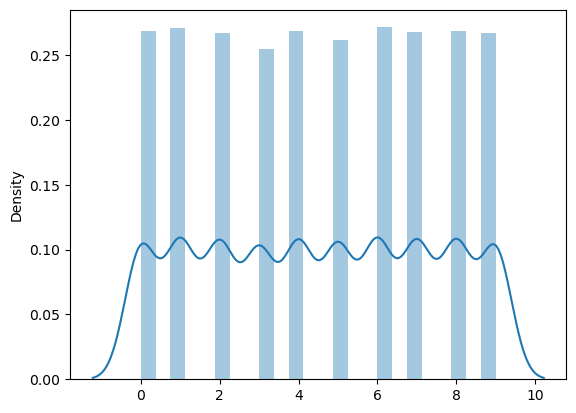

In [79]:
sns.distplot(y_test_B)

In [80]:
print('Shape of X_train: ',X_train_B.shape)
print('Shape of X_test: ',X_test_B.shape)
print('Shape of y_train: ',y_train_B.shape)
print('Shape of y_test: ',y_test_B.shape)

Shape of X_train:  (42000, 32, 32)
Shape of X_test:  (18000, 32, 32)
Shape of y_train:  (42000,)
Shape of y_test:  (18000,)


In [81]:
if (X_train_B.shape[0] == y_train_B.shape[0]) and (X_test_B.shape[0] == y_test_B.shape[0]):
    print('The X and y dataset are in sync')
else:
    print('The X and y dataset are NOT in sync')

The X and y dataset are in sync


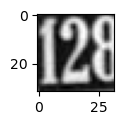

Label for the image is: 2 




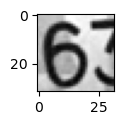

Label for the image is: 6 




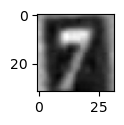

Label for the image is: 7 




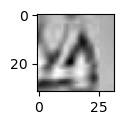

Label for the image is: 4 




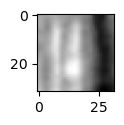

Label for the image is: 4 




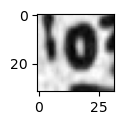

Label for the image is: 0 




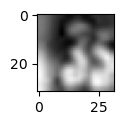

Label for the image is: 3 




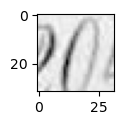

Label for the image is: 0 




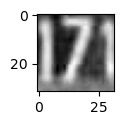

Label for the image is: 7 




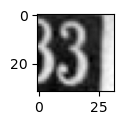

Label for the image is: 3 




In [82]:
for i in range(0,10):
    _=plt.figure(figsize=(1,1))
    _=plt.imshow(X_train_B[i],cmap='gray')
    _=plt.show()
    print(f'Label for the image is: {y_train_B[i]} \n\n')
    

In [83]:
image_vector_size = 32*32
X_train_B = X_train_B.reshape(X_train_B.shape[0], image_vector_size)
X_test_B = X_test_B.reshape(X_test_B.shape[0], image_vector_size)
X_val_B = X_val_B.reshape(X_val_B.shape[0], image_vector_size)

print(f'Training set: X_Train Shape is: {X_train_B.shape}, y_train shape is {y_train_B.shape}')
print(f'Test set: X_Test Shape is: {X_test_B.shape}, y_test shape is {y_test_B.shape}')
print(f'Validation set: X_val Shape is: {X_val_B.shape}, y_val shape is {y_val_B.shape}')

Training set: X_Train Shape is: (42000, 1024), y_train shape is (42000,)
Test set: X_Test Shape is: (18000, 1024), y_test shape is (18000,)
Validation set: X_val Shape is: (60000, 1024), y_val shape is (60000,)


In [84]:
from sklearn.preprocessing import MinMaxScaler
X_train_B_sc=MinMaxScaler().fit_transform(X_train_B)
X_test_B_sc=MinMaxScaler().fit_transform(X_test_B)
X_val_B_sc=MinMaxScaler().fit_transform(X_val_B)

In [85]:
X_train_B_sc.min()

0.0

In [86]:
X_train_B_sc.max()

1.0000001

In [87]:
X_train_B_sc.shape

(42000, 1024)

**Converting to "one-hot" vectors using the to_categorical function**

In [88]:
y_train_B_cat = utils.to_categorical(y_train_B)
y_test_B_cat = utils.to_categorical(y_test_B)
y_val_B_cat = utils.to_categorical(y_val_B)

In [89]:
y_val_B_cat.shape

(60000, 10)

In [90]:
num_classes_B = y_train_B_cat.shape[1]
print(f'total number of classes in the dataset: {num_classes_B}')

total number of classes in the dataset: 10


**We'll experiment with a neural network having the following properties:**
- 7 hidden layers
- 512 neurons in the first, third and fifth layer, 128 in second, fourth and sixth layer and 64 neuron the in seventh hidden layer
- ReLu activation function in each layer
- HE weights initializer
- 50% Droupout and Batch Normalization in third to seventh hidden layers
- Softmax activation in the output layer for multi-class classification

In [91]:
# create model
tf.keras.backend.clear_session()
model_B1 = Sequential()  

model_B1.add(Dense(512, activation='relu',kernel_initializer='he_uniform',input_shape=(X_train_B_sc.shape[1],)))


model_B1.add(Dense(128, activation='relu',kernel_initializer='he_uniform'))


model_B1.add(Dense(512, activation='relu',kernel_initializer='he_uniform'))
model_B1.add(Dropout(0.5))
model_B1.add(BatchNormalization())

model_B1.add(Dense(128, activation='relu',kernel_initializer='he_uniform'))
model_B1.add(Dropout(0.5))
model_B1.add(BatchNormalization())

model_B1.add(Dense(512, activation='relu',kernel_initializer='he_uniform'))
model_B1.add(Dropout(0.5))
model_B1.add(BatchNormalization())

model_B1.add(Dense(128, activation='relu',kernel_initializer='he_uniform'))
model_B1.add(Dropout(0.5))
model_B1.add(BatchNormalization())

model_B1.add(Dense(64, activation='relu',kernel_initializer='he_uniform'))
model_B1.add(Dropout(0.5))
model_B1.add(BatchNormalization())

model_B1.add(Dense(num_classes_B, activation='softmax'))

In [92]:
#Well use Adam optimizer
optimizer = optimizers.Adam(learning_rate=1e-3)
model_B1.compile(loss=losses.categorical_crossentropy, optimizer=optimizer, metrics=['accuracy'])

In [93]:
model_B1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 512)               524800    
                                                                 
 dense_1 (Dense)             (None, 128)               65664     
                                                                 
 dense_2 (Dense)             (None, 512)               66048     
                                                                 
 dropout (Dropout)           (None, 512)               0         
                                                                 
 batch_normalization (Batch  (None, 512)               2048      
 Normalization)                                                  
                                                                 
 dense_3 (Dense)             (None, 128)               65664     
                                                        

In [94]:
reduce_lr = ReduceLROnPlateau(monitor='val_loss',factor=0.1,patience=30,min_lr=1e-5,model='auto')

#early_stopping = EarlyStopping(monitor='val_loss', patience=50)

callbacks = [reduce_lr]

**Printing the Model Architecture**

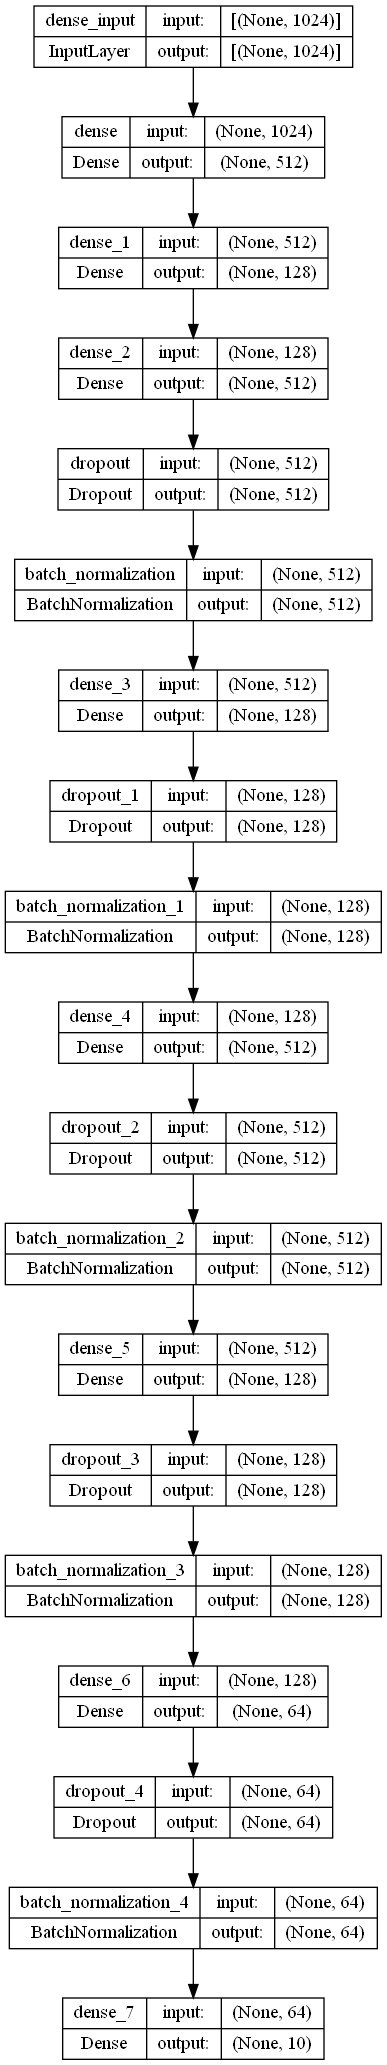

In [95]:
plot_model(model_B1,show_shapes=True,show_layer_names=True,expand_nested=True,dpi=96)

In [96]:
history_B1=model_B1.fit(X_train_B_sc, y_train_B_cat, validation_data=(X_val_B_sc,y_val_B_cat), epochs=1000, batch_size=500, callbacks=callbacks, verbose=2,workers=4,use_multiprocessing=True)

Epoch 1/1000
84/84 - 8s - loss: 2.7311 - accuracy: 0.1010 - val_loss: 2.3428 - val_accuracy: 0.1011 - lr: 0.0010 - 8s/epoch - 96ms/step
Epoch 2/1000
84/84 - 4s - loss: 2.4917 - accuracy: 0.0988 - val_loss: 2.3077 - val_accuracy: 0.1023 - lr: 0.0010 - 4s/epoch - 45ms/step
Epoch 3/1000
84/84 - 4s - loss: 2.4025 - accuracy: 0.1012 - val_loss: 2.3044 - val_accuracy: 0.1021 - lr: 0.0010 - 4s/epoch - 46ms/step
Epoch 4/1000
84/84 - 4s - loss: 2.3625 - accuracy: 0.0991 - val_loss: 2.3035 - val_accuracy: 0.1006 - lr: 0.0010 - 4s/epoch - 45ms/step
Epoch 5/1000
84/84 - 4s - loss: 2.3368 - accuracy: 0.0971 - val_loss: 2.3031 - val_accuracy: 0.1002 - lr: 0.0010 - 4s/epoch - 46ms/step
Epoch 6/1000
84/84 - 4s - loss: 2.3224 - accuracy: 0.1000 - val_loss: 2.3029 - val_accuracy: 0.1010 - lr: 0.0010 - 4s/epoch - 45ms/step
Epoch 7/1000
84/84 - 4s - loss: 2.3149 - accuracy: 0.0985 - val_loss: 2.3028 - val_accuracy: 0.0979 - lr: 0.0010 - 4s/epoch - 45ms/step
Epoch 8/1000
84/84 - 4s - loss: 2.3111 - accurac

Epoch 61/1000
84/84 - 4s - loss: 1.1379 - accuracy: 0.6349 - val_loss: 0.9522 - val_accuracy: 0.7043 - lr: 0.0010 - 4s/epoch - 45ms/step
Epoch 62/1000
84/84 - 4s - loss: 1.1193 - accuracy: 0.6453 - val_loss: 0.9905 - val_accuracy: 0.6873 - lr: 0.0010 - 4s/epoch - 44ms/step
Epoch 63/1000
84/84 - 4s - loss: 1.0857 - accuracy: 0.6566 - val_loss: 0.9381 - val_accuracy: 0.7051 - lr: 0.0010 - 4s/epoch - 45ms/step
Epoch 64/1000
84/84 - 4s - loss: 1.1025 - accuracy: 0.6524 - val_loss: 0.9418 - val_accuracy: 0.7020 - lr: 0.0010 - 4s/epoch - 44ms/step
Epoch 65/1000
84/84 - 4s - loss: 1.0805 - accuracy: 0.6611 - val_loss: 0.9522 - val_accuracy: 0.7032 - lr: 0.0010 - 4s/epoch - 51ms/step
Epoch 66/1000
84/84 - 4s - loss: 1.0452 - accuracy: 0.6756 - val_loss: 0.8831 - val_accuracy: 0.7255 - lr: 0.0010 - 4s/epoch - 45ms/step
Epoch 67/1000
84/84 - 4s - loss: 1.0348 - accuracy: 0.6820 - val_loss: 0.9579 - val_accuracy: 0.6944 - lr: 0.0010 - 4s/epoch - 45ms/step
Epoch 68/1000
84/84 - 4s - loss: 1.0335 -

Epoch 121/1000
84/84 - 4s - loss: 0.7048 - accuracy: 0.7973 - val_loss: 0.6212 - val_accuracy: 0.8125 - lr: 0.0010 - 4s/epoch - 46ms/step
Epoch 122/1000
84/84 - 4s - loss: 0.7144 - accuracy: 0.7954 - val_loss: 0.6538 - val_accuracy: 0.8037 - lr: 0.0010 - 4s/epoch - 45ms/step
Epoch 123/1000
84/84 - 4s - loss: 0.7071 - accuracy: 0.7976 - val_loss: 0.6201 - val_accuracy: 0.8138 - lr: 0.0010 - 4s/epoch - 45ms/step
Epoch 124/1000
84/84 - 4s - loss: 0.6951 - accuracy: 0.7999 - val_loss: 0.6430 - val_accuracy: 0.8081 - lr: 0.0010 - 4s/epoch - 45ms/step
Epoch 125/1000
84/84 - 4s - loss: 0.6955 - accuracy: 0.8025 - val_loss: 0.5857 - val_accuracy: 0.8238 - lr: 0.0010 - 4s/epoch - 47ms/step
Epoch 126/1000
84/84 - 4s - loss: 0.6838 - accuracy: 0.8060 - val_loss: 0.6036 - val_accuracy: 0.8224 - lr: 0.0010 - 4s/epoch - 46ms/step
Epoch 127/1000
84/84 - 4s - loss: 0.6914 - accuracy: 0.8016 - val_loss: 0.6167 - val_accuracy: 0.8181 - lr: 0.0010 - 4s/epoch - 47ms/step
Epoch 128/1000
84/84 - 4s - loss: 

Epoch 181/1000
84/84 - 4s - loss: 0.5921 - accuracy: 0.8331 - val_loss: 0.5258 - val_accuracy: 0.8463 - lr: 0.0010 - 4s/epoch - 45ms/step
Epoch 182/1000
84/84 - 4s - loss: 0.6111 - accuracy: 0.8262 - val_loss: 0.5008 - val_accuracy: 0.8523 - lr: 0.0010 - 4s/epoch - 45ms/step
Epoch 183/1000
84/84 - 4s - loss: 0.5915 - accuracy: 0.8313 - val_loss: 0.5437 - val_accuracy: 0.8392 - lr: 0.0010 - 4s/epoch - 46ms/step
Epoch 184/1000
84/84 - 4s - loss: 0.5825 - accuracy: 0.8332 - val_loss: 0.4974 - val_accuracy: 0.8524 - lr: 0.0010 - 4s/epoch - 45ms/step
Epoch 185/1000
84/84 - 4s - loss: 0.5896 - accuracy: 0.8337 - val_loss: 0.5352 - val_accuracy: 0.8428 - lr: 0.0010 - 4s/epoch - 45ms/step
Epoch 186/1000
84/84 - 4s - loss: 0.5920 - accuracy: 0.8314 - val_loss: 0.5064 - val_accuracy: 0.8496 - lr: 0.0010 - 4s/epoch - 45ms/step
Epoch 187/1000
84/84 - 4s - loss: 0.6155 - accuracy: 0.8219 - val_loss: 0.4907 - val_accuracy: 0.8560 - lr: 0.0010 - 4s/epoch - 46ms/step
Epoch 188/1000
84/84 - 4s - loss: 

Epoch 241/1000
84/84 - 4s - loss: 0.5319 - accuracy: 0.8477 - val_loss: 0.4610 - val_accuracy: 0.8640 - lr: 0.0010 - 4s/epoch - 47ms/step
Epoch 242/1000
84/84 - 4s - loss: 0.5387 - accuracy: 0.8461 - val_loss: 0.4791 - val_accuracy: 0.8580 - lr: 0.0010 - 4s/epoch - 45ms/step
Epoch 243/1000
84/84 - 4s - loss: 0.5434 - accuracy: 0.8455 - val_loss: 0.4729 - val_accuracy: 0.8634 - lr: 0.0010 - 4s/epoch - 45ms/step
Epoch 244/1000
84/84 - 4s - loss: 0.5432 - accuracy: 0.8465 - val_loss: 0.4867 - val_accuracy: 0.8586 - lr: 0.0010 - 4s/epoch - 45ms/step
Epoch 245/1000
84/84 - 4s - loss: 0.5330 - accuracy: 0.8503 - val_loss: 0.4827 - val_accuracy: 0.8577 - lr: 0.0010 - 4s/epoch - 46ms/step
Epoch 246/1000
84/84 - 4s - loss: 0.5384 - accuracy: 0.8479 - val_loss: 0.4792 - val_accuracy: 0.8586 - lr: 0.0010 - 4s/epoch - 48ms/step
Epoch 247/1000
84/84 - 4s - loss: 0.5315 - accuracy: 0.8480 - val_loss: 0.4634 - val_accuracy: 0.8667 - lr: 0.0010 - 4s/epoch - 49ms/step
Epoch 248/1000
84/84 - 4s - loss: 

Epoch 301/1000
84/84 - 4s - loss: 0.4985 - accuracy: 0.8583 - val_loss: 0.4745 - val_accuracy: 0.8624 - lr: 0.0010 - 4s/epoch - 45ms/step
Epoch 302/1000
84/84 - 4s - loss: 0.4946 - accuracy: 0.8598 - val_loss: 0.4410 - val_accuracy: 0.8731 - lr: 0.0010 - 4s/epoch - 45ms/step
Epoch 303/1000
84/84 - 4s - loss: 0.4878 - accuracy: 0.8620 - val_loss: 0.4395 - val_accuracy: 0.8722 - lr: 0.0010 - 4s/epoch - 45ms/step
Epoch 304/1000
84/84 - 4s - loss: 0.5008 - accuracy: 0.8586 - val_loss: 0.4485 - val_accuracy: 0.8694 - lr: 0.0010 - 4s/epoch - 45ms/step
Epoch 305/1000
84/84 - 4s - loss: 0.4955 - accuracy: 0.8597 - val_loss: 0.4364 - val_accuracy: 0.8762 - lr: 0.0010 - 4s/epoch - 45ms/step
Epoch 306/1000
84/84 - 4s - loss: 0.4904 - accuracy: 0.8616 - val_loss: 0.4698 - val_accuracy: 0.8625 - lr: 0.0010 - 4s/epoch - 46ms/step
Epoch 307/1000
84/84 - 4s - loss: 0.5033 - accuracy: 0.8582 - val_loss: 0.4322 - val_accuracy: 0.8749 - lr: 0.0010 - 4s/epoch - 46ms/step
Epoch 308/1000
84/84 - 4s - loss: 

Epoch 360/1000
84/84 - 4s - loss: 0.3963 - accuracy: 0.8877 - val_loss: 0.3646 - val_accuracy: 0.8980 - lr: 1.0000e-04 - 4s/epoch - 49ms/step
Epoch 361/1000
84/84 - 4s - loss: 0.4029 - accuracy: 0.8872 - val_loss: 0.3679 - val_accuracy: 0.8969 - lr: 1.0000e-04 - 4s/epoch - 45ms/step
Epoch 362/1000
84/84 - 4s - loss: 0.3972 - accuracy: 0.8879 - val_loss: 0.3697 - val_accuracy: 0.8973 - lr: 1.0000e-04 - 4s/epoch - 45ms/step
Epoch 363/1000
84/84 - 4s - loss: 0.4000 - accuracy: 0.8869 - val_loss: 0.3676 - val_accuracy: 0.8977 - lr: 1.0000e-04 - 4s/epoch - 46ms/step
Epoch 364/1000
84/84 - 4s - loss: 0.3935 - accuracy: 0.8886 - val_loss: 0.3633 - val_accuracy: 0.8986 - lr: 1.0000e-04 - 4s/epoch - 47ms/step
Epoch 365/1000
84/84 - 4s - loss: 0.3973 - accuracy: 0.8876 - val_loss: 0.3646 - val_accuracy: 0.8984 - lr: 1.0000e-04 - 4s/epoch - 46ms/step
Epoch 366/1000
84/84 - 4s - loss: 0.3919 - accuracy: 0.8882 - val_loss: 0.3641 - val_accuracy: 0.8981 - lr: 1.0000e-04 - 4s/epoch - 45ms/step
Epoch 

Epoch 418/1000
84/84 - 4s - loss: 0.3855 - accuracy: 0.8902 - val_loss: 0.3588 - val_accuracy: 0.9006 - lr: 1.0000e-04 - 4s/epoch - 46ms/step
Epoch 419/1000
84/84 - 4s - loss: 0.3791 - accuracy: 0.8925 - val_loss: 0.3577 - val_accuracy: 0.9014 - lr: 1.0000e-04 - 4s/epoch - 45ms/step
Epoch 420/1000
84/84 - 4s - loss: 0.3797 - accuracy: 0.8907 - val_loss: 0.3567 - val_accuracy: 0.9015 - lr: 1.0000e-04 - 4s/epoch - 45ms/step
Epoch 421/1000
84/84 - 4s - loss: 0.3852 - accuracy: 0.8925 - val_loss: 0.3559 - val_accuracy: 0.9014 - lr: 1.0000e-04 - 4s/epoch - 48ms/step
Epoch 422/1000
84/84 - 4s - loss: 0.3870 - accuracy: 0.8900 - val_loss: 0.3608 - val_accuracy: 0.9000 - lr: 1.0000e-04 - 4s/epoch - 48ms/step
Epoch 423/1000
84/84 - 4s - loss: 0.3826 - accuracy: 0.8910 - val_loss: 0.3575 - val_accuracy: 0.9013 - lr: 1.0000e-04 - 4s/epoch - 48ms/step
Epoch 424/1000
84/84 - 4s - loss: 0.3887 - accuracy: 0.8905 - val_loss: 0.3608 - val_accuracy: 0.9007 - lr: 1.0000e-04 - 4s/epoch - 46ms/step
Epoch 

Epoch 476/1000
84/84 - 4s - loss: 0.3748 - accuracy: 0.8935 - val_loss: 0.3542 - val_accuracy: 0.9033 - lr: 1.0000e-04 - 4s/epoch - 46ms/step
Epoch 477/1000
84/84 - 4s - loss: 0.3713 - accuracy: 0.8958 - val_loss: 0.3580 - val_accuracy: 0.9021 - lr: 1.0000e-04 - 4s/epoch - 45ms/step
Epoch 478/1000
84/84 - 4s - loss: 0.3733 - accuracy: 0.8934 - val_loss: 0.3539 - val_accuracy: 0.9040 - lr: 1.0000e-04 - 4s/epoch - 45ms/step
Epoch 479/1000
84/84 - 4s - loss: 0.3726 - accuracy: 0.8953 - val_loss: 0.3578 - val_accuracy: 0.9023 - lr: 1.0000e-04 - 4s/epoch - 45ms/step
Epoch 480/1000
84/84 - 4s - loss: 0.3737 - accuracy: 0.8942 - val_loss: 0.3529 - val_accuracy: 0.9034 - lr: 1.0000e-04 - 4s/epoch - 47ms/step
Epoch 481/1000
84/84 - 4s - loss: 0.3696 - accuracy: 0.8958 - val_loss: 0.3524 - val_accuracy: 0.9033 - lr: 1.0000e-04 - 4s/epoch - 46ms/step
Epoch 482/1000
84/84 - 4s - loss: 0.3791 - accuracy: 0.8937 - val_loss: 0.3560 - val_accuracy: 0.9019 - lr: 1.0000e-04 - 4s/epoch - 47ms/step
Epoch 

Epoch 534/1000
84/84 - 4s - loss: 0.3659 - accuracy: 0.8963 - val_loss: 0.3498 - val_accuracy: 0.9050 - lr: 1.0000e-04 - 4s/epoch - 45ms/step
Epoch 535/1000
84/84 - 4s - loss: 0.3683 - accuracy: 0.8965 - val_loss: 0.3500 - val_accuracy: 0.9048 - lr: 1.0000e-04 - 4s/epoch - 45ms/step
Epoch 536/1000
84/84 - 4s - loss: 0.3710 - accuracy: 0.8962 - val_loss: 0.3515 - val_accuracy: 0.9035 - lr: 1.0000e-04 - 4s/epoch - 48ms/step
Epoch 537/1000
84/84 - 4s - loss: 0.3737 - accuracy: 0.8933 - val_loss: 0.3513 - val_accuracy: 0.9038 - lr: 1.0000e-04 - 4s/epoch - 45ms/step
Epoch 538/1000
84/84 - 4s - loss: 0.3645 - accuracy: 0.8965 - val_loss: 0.3519 - val_accuracy: 0.9044 - lr: 1.0000e-04 - 4s/epoch - 46ms/step
Epoch 539/1000
84/84 - 4s - loss: 0.3723 - accuracy: 0.8959 - val_loss: 0.3471 - val_accuracy: 0.9062 - lr: 1.0000e-04 - 4s/epoch - 45ms/step
Epoch 540/1000
84/84 - 4s - loss: 0.3596 - accuracy: 0.8982 - val_loss: 0.3501 - val_accuracy: 0.9045 - lr: 1.0000e-04 - 4s/epoch - 49ms/step
Epoch 

Epoch 592/1000
84/84 - 4s - loss: 0.3570 - accuracy: 0.8992 - val_loss: 0.3487 - val_accuracy: 0.9063 - lr: 1.0000e-04 - 4s/epoch - 46ms/step
Epoch 593/1000
84/84 - 4s - loss: 0.3606 - accuracy: 0.8990 - val_loss: 0.3478 - val_accuracy: 0.9064 - lr: 1.0000e-04 - 4s/epoch - 47ms/step
Epoch 594/1000
84/84 - 4s - loss: 0.3600 - accuracy: 0.8989 - val_loss: 0.3469 - val_accuracy: 0.9060 - lr: 1.0000e-04 - 4s/epoch - 49ms/step
Epoch 595/1000
84/84 - 4s - loss: 0.3618 - accuracy: 0.8975 - val_loss: 0.3438 - val_accuracy: 0.9068 - lr: 1.0000e-04 - 4s/epoch - 46ms/step
Epoch 596/1000
84/84 - 4s - loss: 0.3546 - accuracy: 0.9000 - val_loss: 0.3466 - val_accuracy: 0.9058 - lr: 1.0000e-04 - 4s/epoch - 46ms/step
Epoch 597/1000
84/84 - 4s - loss: 0.3566 - accuracy: 0.8989 - val_loss: 0.3452 - val_accuracy: 0.9070 - lr: 1.0000e-04 - 4s/epoch - 48ms/step
Epoch 598/1000
84/84 - 4s - loss: 0.3597 - accuracy: 0.8986 - val_loss: 0.3447 - val_accuracy: 0.9070 - lr: 1.0000e-04 - 4s/epoch - 45ms/step
Epoch 

Epoch 650/1000
84/84 - 4s - loss: 0.3452 - accuracy: 0.9030 - val_loss: 0.3396 - val_accuracy: 0.9087 - lr: 1.0000e-05 - 4s/epoch - 45ms/step
Epoch 651/1000
84/84 - 4s - loss: 0.3489 - accuracy: 0.9022 - val_loss: 0.3393 - val_accuracy: 0.9090 - lr: 1.0000e-05 - 4s/epoch - 48ms/step
Epoch 652/1000
84/84 - 4s - loss: 0.3436 - accuracy: 0.9033 - val_loss: 0.3388 - val_accuracy: 0.9091 - lr: 1.0000e-05 - 4s/epoch - 46ms/step
Epoch 653/1000
84/84 - 4s - loss: 0.3458 - accuracy: 0.9024 - val_loss: 0.3401 - val_accuracy: 0.9086 - lr: 1.0000e-05 - 4s/epoch - 47ms/step
Epoch 654/1000
84/84 - 4s - loss: 0.3500 - accuracy: 0.9019 - val_loss: 0.3396 - val_accuracy: 0.9089 - lr: 1.0000e-05 - 4s/epoch - 45ms/step
Epoch 655/1000
84/84 - 4s - loss: 0.3497 - accuracy: 0.9015 - val_loss: 0.3389 - val_accuracy: 0.9090 - lr: 1.0000e-05 - 4s/epoch - 45ms/step
Epoch 656/1000
84/84 - 4s - loss: 0.3451 - accuracy: 0.9018 - val_loss: 0.3404 - val_accuracy: 0.9089 - lr: 1.0000e-05 - 4s/epoch - 46ms/step
Epoch 

Epoch 708/1000
84/84 - 4s - loss: 0.3490 - accuracy: 0.9013 - val_loss: 0.3389 - val_accuracy: 0.9090 - lr: 1.0000e-05 - 4s/epoch - 45ms/step
Epoch 709/1000
84/84 - 4s - loss: 0.3470 - accuracy: 0.9032 - val_loss: 0.3394 - val_accuracy: 0.9087 - lr: 1.0000e-05 - 4s/epoch - 47ms/step
Epoch 710/1000
84/84 - 4s - loss: 0.3495 - accuracy: 0.8998 - val_loss: 0.3387 - val_accuracy: 0.9092 - lr: 1.0000e-05 - 4s/epoch - 46ms/step
Epoch 711/1000
84/84 - 4s - loss: 0.3468 - accuracy: 0.9029 - val_loss: 0.3380 - val_accuracy: 0.9090 - lr: 1.0000e-05 - 4s/epoch - 48ms/step
Epoch 712/1000
84/84 - 4s - loss: 0.3399 - accuracy: 0.9031 - val_loss: 0.3380 - val_accuracy: 0.9094 - lr: 1.0000e-05 - 4s/epoch - 49ms/step
Epoch 713/1000
84/84 - 4s - loss: 0.3411 - accuracy: 0.9035 - val_loss: 0.3388 - val_accuracy: 0.9093 - lr: 1.0000e-05 - 4s/epoch - 45ms/step
Epoch 714/1000
84/84 - 4s - loss: 0.3455 - accuracy: 0.9014 - val_loss: 0.3385 - val_accuracy: 0.9092 - lr: 1.0000e-05 - 4s/epoch - 46ms/step
Epoch 

Epoch 766/1000
84/84 - 4s - loss: 0.3419 - accuracy: 0.9025 - val_loss: 0.3380 - val_accuracy: 0.9094 - lr: 1.0000e-05 - 4s/epoch - 46ms/step
Epoch 767/1000
84/84 - 4s - loss: 0.3441 - accuracy: 0.9039 - val_loss: 0.3387 - val_accuracy: 0.9094 - lr: 1.0000e-05 - 4s/epoch - 47ms/step
Epoch 768/1000
84/84 - 4s - loss: 0.3471 - accuracy: 0.9025 - val_loss: 0.3388 - val_accuracy: 0.9092 - lr: 1.0000e-05 - 4s/epoch - 47ms/step
Epoch 769/1000
84/84 - 4s - loss: 0.3394 - accuracy: 0.9039 - val_loss: 0.3399 - val_accuracy: 0.9089 - lr: 1.0000e-05 - 4s/epoch - 47ms/step
Epoch 770/1000
84/84 - 4s - loss: 0.3441 - accuracy: 0.9022 - val_loss: 0.3392 - val_accuracy: 0.9092 - lr: 1.0000e-05 - 4s/epoch - 46ms/step
Epoch 771/1000
84/84 - 4s - loss: 0.3424 - accuracy: 0.9030 - val_loss: 0.3390 - val_accuracy: 0.9093 - lr: 1.0000e-05 - 4s/epoch - 47ms/step
Epoch 772/1000
84/84 - 4s - loss: 0.3497 - accuracy: 0.9020 - val_loss: 0.3385 - val_accuracy: 0.9094 - lr: 1.0000e-05 - 4s/epoch - 50ms/step
Epoch 

Epoch 824/1000
84/84 - 5s - loss: 0.3415 - accuracy: 0.9035 - val_loss: 0.3374 - val_accuracy: 0.9097 - lr: 1.0000e-05 - 5s/epoch - 56ms/step
Epoch 825/1000
84/84 - 5s - loss: 0.3426 - accuracy: 0.9021 - val_loss: 0.3389 - val_accuracy: 0.9092 - lr: 1.0000e-05 - 5s/epoch - 56ms/step
Epoch 826/1000
84/84 - 4s - loss: 0.3399 - accuracy: 0.9047 - val_loss: 0.3376 - val_accuracy: 0.9099 - lr: 1.0000e-05 - 4s/epoch - 51ms/step
Epoch 827/1000
84/84 - 4s - loss: 0.3458 - accuracy: 0.9024 - val_loss: 0.3378 - val_accuracy: 0.9097 - lr: 1.0000e-05 - 4s/epoch - 51ms/step
Epoch 828/1000
84/84 - 4s - loss: 0.3454 - accuracy: 0.9020 - val_loss: 0.3380 - val_accuracy: 0.9095 - lr: 1.0000e-05 - 4s/epoch - 53ms/step
Epoch 829/1000
84/84 - 4s - loss: 0.3426 - accuracy: 0.9034 - val_loss: 0.3377 - val_accuracy: 0.9097 - lr: 1.0000e-05 - 4s/epoch - 47ms/step
Epoch 830/1000
84/84 - 4s - loss: 0.3423 - accuracy: 0.9036 - val_loss: 0.3378 - val_accuracy: 0.9093 - lr: 1.0000e-05 - 4s/epoch - 46ms/step
Epoch 

Epoch 882/1000
84/84 - 4s - loss: 0.3448 - accuracy: 0.9020 - val_loss: 0.3373 - val_accuracy: 0.9100 - lr: 1.0000e-05 - 4s/epoch - 48ms/step
Epoch 883/1000
84/84 - 4s - loss: 0.3418 - accuracy: 0.9044 - val_loss: 0.3375 - val_accuracy: 0.9097 - lr: 1.0000e-05 - 4s/epoch - 48ms/step
Epoch 884/1000
84/84 - 4s - loss: 0.3415 - accuracy: 0.9030 - val_loss: 0.3381 - val_accuracy: 0.9095 - lr: 1.0000e-05 - 4s/epoch - 46ms/step
Epoch 885/1000
84/84 - 4s - loss: 0.3416 - accuracy: 0.9034 - val_loss: 0.3381 - val_accuracy: 0.9099 - lr: 1.0000e-05 - 4s/epoch - 46ms/step
Epoch 886/1000
84/84 - 4s - loss: 0.3432 - accuracy: 0.9035 - val_loss: 0.3377 - val_accuracy: 0.9099 - lr: 1.0000e-05 - 4s/epoch - 46ms/step
Epoch 887/1000
84/84 - 4s - loss: 0.3431 - accuracy: 0.9017 - val_loss: 0.3380 - val_accuracy: 0.9098 - lr: 1.0000e-05 - 4s/epoch - 45ms/step
Epoch 888/1000
84/84 - 4s - loss: 0.3426 - accuracy: 0.9027 - val_loss: 0.3388 - val_accuracy: 0.9096 - lr: 1.0000e-05 - 4s/epoch - 47ms/step
Epoch 

Epoch 940/1000
84/84 - 4s - loss: 0.3429 - accuracy: 0.9053 - val_loss: 0.3377 - val_accuracy: 0.9098 - lr: 1.0000e-05 - 4s/epoch - 47ms/step
Epoch 941/1000
84/84 - 4s - loss: 0.3362 - accuracy: 0.9044 - val_loss: 0.3371 - val_accuracy: 0.9100 - lr: 1.0000e-05 - 4s/epoch - 47ms/step
Epoch 942/1000
84/84 - 4s - loss: 0.3407 - accuracy: 0.9035 - val_loss: 0.3381 - val_accuracy: 0.9095 - lr: 1.0000e-05 - 4s/epoch - 47ms/step
Epoch 943/1000
84/84 - 4s - loss: 0.3371 - accuracy: 0.9044 - val_loss: 0.3372 - val_accuracy: 0.9101 - lr: 1.0000e-05 - 4s/epoch - 48ms/step
Epoch 944/1000
84/84 - 4s - loss: 0.3384 - accuracy: 0.9048 - val_loss: 0.3374 - val_accuracy: 0.9100 - lr: 1.0000e-05 - 4s/epoch - 46ms/step
Epoch 945/1000
84/84 - 4s - loss: 0.3399 - accuracy: 0.9050 - val_loss: 0.3383 - val_accuracy: 0.9095 - lr: 1.0000e-05 - 4s/epoch - 46ms/step
Epoch 946/1000
84/84 - 4s - loss: 0.3409 - accuracy: 0.9036 - val_loss: 0.3375 - val_accuracy: 0.9099 - lr: 1.0000e-05 - 4s/epoch - 46ms/step
Epoch 

Epoch 998/1000
84/84 - 4s - loss: 0.3415 - accuracy: 0.9031 - val_loss: 0.3370 - val_accuracy: 0.9100 - lr: 1.0000e-05 - 4s/epoch - 47ms/step
Epoch 999/1000
84/84 - 4s - loss: 0.3406 - accuracy: 0.9027 - val_loss: 0.3378 - val_accuracy: 0.9094 - lr: 1.0000e-05 - 4s/epoch - 46ms/step
Epoch 1000/1000
84/84 - 4s - loss: 0.3361 - accuracy: 0.9045 - val_loss: 0.3363 - val_accuracy: 0.9101 - lr: 1.0000e-05 - 4s/epoch - 46ms/step


**Plotting the training/validation loss vs epochs**

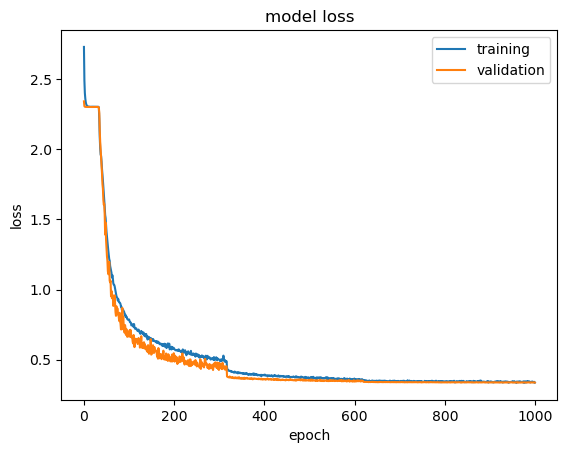

In [97]:
_=plt.plot(history_B1.history['loss'])
_=plt.plot(history_B1.history['val_loss'])
_=plt.title('model loss')
_=plt.ylabel('loss')
_=plt.xlabel('epoch')
_=plt.legend(['training', 'validation'], loc='best')
_=plt.show()

**Plotting the training/validation Accuracy vs epochs**

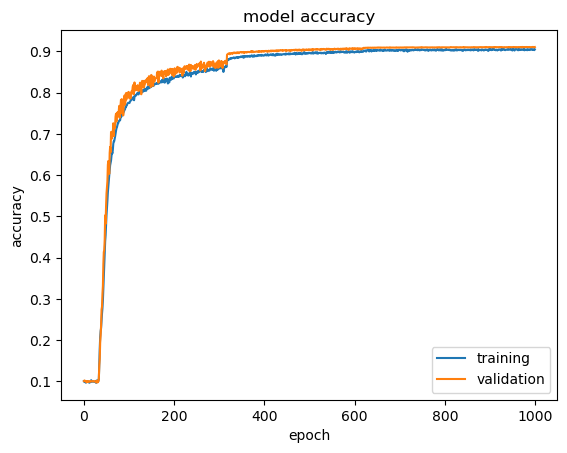

In [98]:
_=plt.plot(history_B1.history['accuracy'])
_=plt.plot(history_B1.history['val_accuracy'])
_=plt.title('model accuracy')
_=plt.ylabel('accuracy')
_=plt.xlabel('epoch')
_=plt.legend(['training', 'validation'], loc='best')
_=plt.show()

### Loss and Accuracy of the model on Test Data

In [99]:
loss,accuracy=model_B1.evaluate(X_test_B_sc,y_test_B_cat)
print(f'Cross Entropy Loss of the model on Test data: {loss:.2f}')
print(f'Accuracy of the model on Test data: {accuracy:.2f}')

563/563 [==============================] - 3s 4ms/step - loss: 0.6688 - accuracy: 0.8347
Cross Entropy Loss of the model on Test data: 0.67
Accuracy of the model on Test data: 0.83


In [100]:
# predicting the model on test data
y_pred=model_B1.predict(X_test_B_sc)


563/563 [==============================] - 2s 4ms/step


In [101]:
# As our outputs are probabilities so we will try to get the output class from these probablities by getting the maximum value
y_pred_final=[]
for i in y_pred:
    y_pred_final.append(np.argmax(i))

### Classification Report

In [102]:
from sklearn.metrics import classification_report
print(classification_report(y_test_B,y_pred_final))

              precision    recall  f1-score   support

           0       0.86      0.88      0.87      1814
           1       0.82      0.87      0.84      1828
           2       0.87      0.84      0.86      1803
           3       0.83      0.78      0.80      1719
           4       0.84      0.87      0.86      1812
           5       0.81      0.82      0.81      1768
           6       0.82      0.83      0.83      1832
           7       0.89      0.85      0.87      1808
           8       0.78      0.79      0.79      1812
           9       0.83      0.82      0.82      1804

    accuracy                           0.83     18000
   macro avg       0.84      0.83      0.83     18000
weighted avg       0.84      0.83      0.83     18000



### Recall

In [103]:
labels_B = range(0,10)
from sklearn import metrics
Recall = metrics.recall_score(y_test_B,y_pred_final,average=None)
for i , j in enumerate(Recall):
    print('The Recall of the trained model on test data for Class {0} is : {1:0.2f}'.format(labels_B[i],j))

The Recall of the trained model on test data for Class 0 is : 0.88
The Recall of the trained model on test data for Class 1 is : 0.87
The Recall of the trained model on test data for Class 2 is : 0.84
The Recall of the trained model on test data for Class 3 is : 0.78
The Recall of the trained model on test data for Class 4 is : 0.87
The Recall of the trained model on test data for Class 5 is : 0.82
The Recall of the trained model on test data for Class 6 is : 0.83
The Recall of the trained model on test data for Class 7 is : 0.85
The Recall of the trained model on test data for Class 8 is : 0.79
The Recall of the trained model on test data for Class 9 is : 0.82


### Precision

In [104]:
Precision = metrics.precision_score(y_test_B,y_pred_final,average=None)
for i , j in enumerate(Precision):
    print('The precision of the trained model on test data for Class {0} is : {1:0.2f}'.format(labels_B[i],j))

The precision of the trained model on test data for Class 0 is : 0.86
The precision of the trained model on test data for Class 1 is : 0.82
The precision of the trained model on test data for Class 2 is : 0.87
The precision of the trained model on test data for Class 3 is : 0.83
The precision of the trained model on test data for Class 4 is : 0.84
The precision of the trained model on test data for Class 5 is : 0.81
The precision of the trained model on test data for Class 6 is : 0.82
The precision of the trained model on test data for Class 7 is : 0.89
The precision of the trained model on test data for Class 8 is : 0.78
The precision of the trained model on test data for Class 9 is : 0.83


### F1-Score

In [105]:
f1score = metrics.f1_score(y_test_B,y_pred_final,average=None)
for i , j in enumerate(f1score):
    print('The F1-Score of the trained model on test data for Class {0} is : {1:0.2f}'.format(labels_B[i],j))

The F1-Score of the trained model on test data for Class 0 is : 0.87
The F1-Score of the trained model on test data for Class 1 is : 0.84
The F1-Score of the trained model on test data for Class 2 is : 0.86
The F1-Score of the trained model on test data for Class 3 is : 0.80
The F1-Score of the trained model on test data for Class 4 is : 0.86
The F1-Score of the trained model on test data for Class 5 is : 0.81
The F1-Score of the trained model on test data for Class 6 is : 0.83
The F1-Score of the trained model on test data for Class 7 is : 0.87
The F1-Score of the trained model on test data for Class 8 is : 0.79
The F1-Score of the trained model on test data for Class 9 is : 0.82


### Confusion Matrix

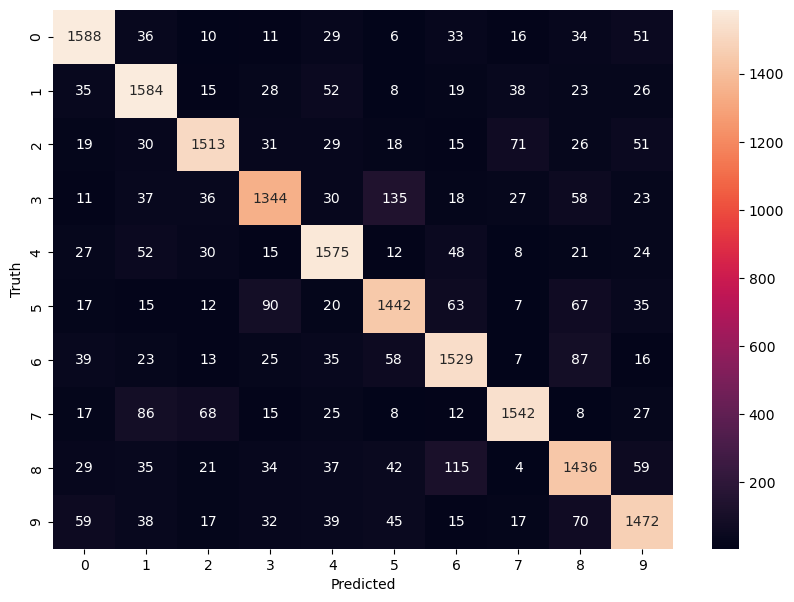

In [106]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

cm=confusion_matrix(y_test_B,y_pred_final)

_=plt.figure(figsize=(10,7))
_=sns.heatmap(cm,annot=True,fmt='d')
_=plt.xlabel('Predicted')
_=plt.ylabel('Truth')
_=plt.show()

### Misclassified images

In [113]:
index = 0
misclassified_images = []
for label, predict in zip(y_test_B, y_pred_final):
    if label != predict: 
        misclassified_images.append(index)
    index +=1
print(misclassified_images)
print(f'\n\nCount of misclassified images: {len(misclassified_images)}')

[0, 1, 7, 8, 27, 40, 46, 58, 62, 64, 68, 85, 89, 90, 92, 100, 102, 108, 127, 132, 136, 137, 138, 140, 142, 149, 150, 151, 162, 176, 183, 185, 194, 200, 203, 210, 222, 223, 232, 235, 246, 251, 252, 253, 262, 266, 267, 268, 300, 304, 307, 323, 337, 346, 347, 355, 358, 360, 363, 372, 403, 404, 418, 437, 446, 448, 450, 451, 456, 457, 466, 480, 489, 496, 498, 503, 504, 507, 510, 511, 512, 520, 524, 527, 530, 535, 537, 543, 551, 556, 560, 562, 563, 586, 592, 600, 612, 620, 640, 661, 663, 664, 665, 690, 691, 694, 699, 704, 706, 715, 717, 720, 753, 768, 771, 780, 784, 787, 795, 797, 799, 809, 813, 824, 835, 838, 856, 860, 862, 865, 871, 872, 882, 887, 889, 891, 895, 896, 908, 909, 910, 926, 928, 932, 935, 936, 942, 944, 946, 948, 951, 953, 954, 955, 965, 983, 985, 991, 995, 997, 1001, 1006, 1013, 1021, 1025, 1026, 1029, 1035, 1040, 1041, 1045, 1046, 1050, 1051, 1057, 1063, 1068, 1073, 1074, 1078, 1080, 1081, 1085, 1086, 1089, 1095, 1098, 1112, 1126, 1132, 1133, 1137, 1138, 1139, 1142, 1147, 11

### Analyzing a Misclassified Image

In [108]:
y_pred[0].argmax()
y_test_B[0]

0

1

1/1 [==============================] - 0s 37ms/step
Was predicted:  0
Was labeled:  1


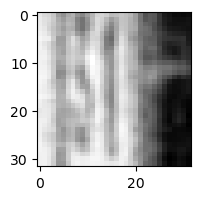

In [109]:
image_index = 0
_=plt.figure(figsize=(2,2))
_=plt.imshow(X_test_B[image_index].reshape(32,32),cmap='Greys')
pred = model_B1.predict(X_test_B_sc[image_index].reshape(-1, 32*32))
print("Was predicted: ",pred.argmax())
print("Was labeled: ",y_test_B[image_index])

**Plotting the training/validation loss vs epochs**

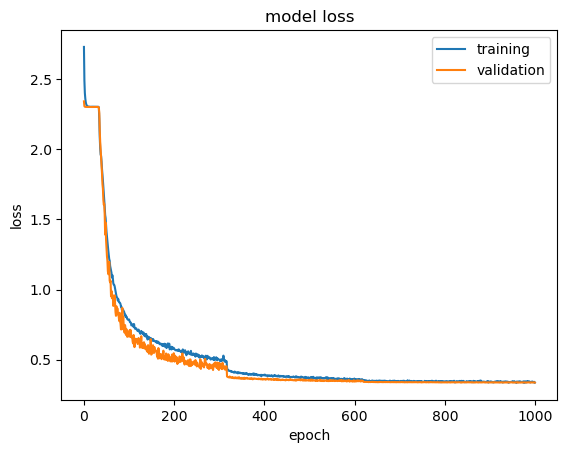

In [110]:
_=plt.plot(history_B1.history['loss'])
_=plt.plot(history_B1.history['val_loss'])
_=plt.title('model loss')
_=plt.ylabel('loss')
_=plt.xlabel('epoch')
_=plt.legend(['training', 'validation'], loc='best')
_=plt.show()

**Plotting the training/validation Accuracy vs epochs**

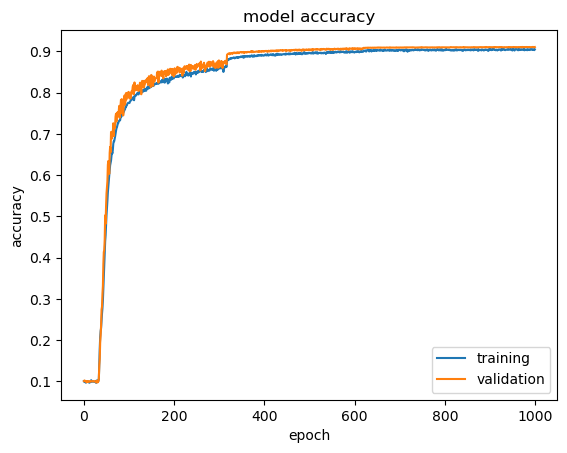

In [111]:
_=plt.plot(history_B1.history['accuracy'])
_=plt.plot(history_B1.history['val_accuracy'])
_=plt.title('model accuracy')
_=plt.ylabel('accuracy')
_=plt.xlabel('epoch')
_=plt.legend(['training', 'validation'], loc='best')
_=plt.show()

### Observations:
- The model has converged well for training and validation loss/accuracy
- The model is not overfit, as the loss and accuracy show similar figures, Training Accuracy of 90.5% and Validation Accuracy of 91% and traning and validation loss around 0.33
- The model was appropriately fit with the use of 50% dropout and Batch Normalization in the hidden layers
- On test data the model has an accuracy of 83%, which is lower than the training and validation accuracy. This might be due to image patterns not observed in training and validation sets
- The model has performed almost equally on all classes 0 to 9. This is because all the classes have similar distribution